In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import models,layers
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Flatten,Dense,Dropout
from keras.optimizers import Adam
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
Datadirectory_ss="/content/drive/MyDrive/Dane do weryfikacji/slabe_swiatlo"
Datadirectory_ds="/content/drive/MyDrive/Dane do weryfikacji/dobra_kamerka"
Datadirectory_sk="/content/drive/MyDrive/Dane do weryfikacji/slaba_kamerka"
Classes=["0","1","2","3","4","5","6"]


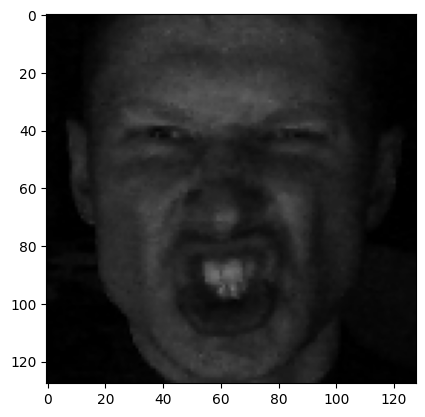

In [4]:
for category in Classes:
    path=os.path.join(Datadirectory_ss,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

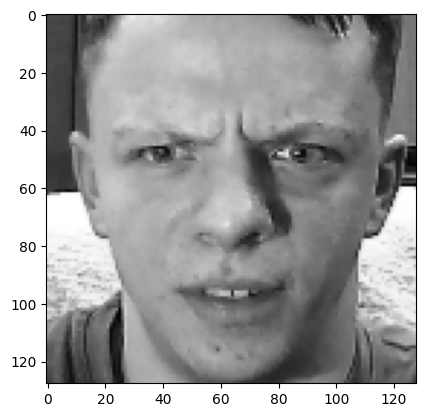

In [5]:
for category in Classes:
    path=os.path.join(Datadirectory_ds,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

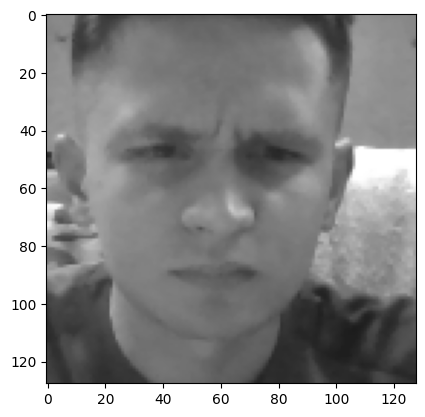

In [6]:
for category in Classes:
    path=os.path.join(Datadirectory_sk,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

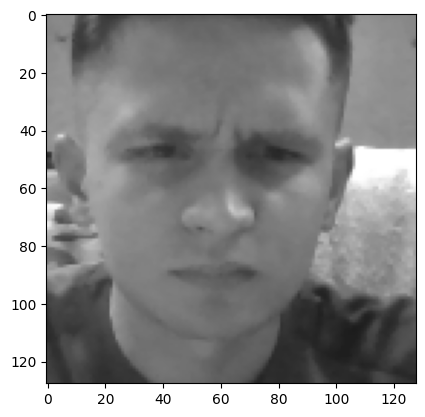

In [7]:
img_size=128
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
new_array.shape


(128, 128, 3)

In [9]:
new_array

array([[[133, 133, 133],
        [134, 134, 134],
        [136, 136, 136],
        ...,
        [134, 134, 134],
        [134, 134, 134],
        [135, 135, 135]],

       [[133, 133, 133],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [135, 135, 135],
        [134, 134, 134],
        [135, 135, 135]],

       [[134, 134, 134],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [135, 135, 135],
        [135, 135, 135],
        [135, 135, 135]],

       ...,

       [[ 66,  66,  66],
        [ 66,  66,  66],
        [ 64,  64,  64],
        ...,
        [ 41,  41,  41],
        [ 40,  40,  40],
        [ 40,  40,  40]],

       [[ 67,  67,  67],
        [ 68,  68,  68],
        [ 65,  65,  65],
        ...,
        [ 43,  43,  43],
        [ 41,  41,  41],
        [ 40,  40,  40]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 68,  68,  68],
        ...,
        [ 50,  50,  50],
        [ 50,  50,  50],
        [ 45,  45,  45]]

Wczytanie wszystkich zdjec i konwersja na macierze

In [10]:
validation_Data_ss = []
validation_Data_sk = []
validation_Data_ds = []
def create_validation_Data_ss():
    for category in Classes:
        path=os.path.join(Datadirectory_ss,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                validation_Data_ss.append([new_array,class_num])
            except Exception as e:
                pass

In [11]:
def create_validation_Data_ds():
    for category in Classes:
        path=os.path.join(Datadirectory_ds,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                validation_Data_ds.append([new_array,class_num])
            except Exception as e:
                pass

In [12]:
def create_validation_Data_sk():
    for category in Classes:
        path=os.path.join(Datadirectory_sk,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                validation_Data_sk.append([new_array,class_num])
            except Exception as e:
                pass

In [13]:
create_validation_Data_ss()
create_validation_Data_sk()
create_validation_Data_ds()

In [14]:
print(len(validation_Data_sk))

334


In [15]:
print(len(validation_Data_ss))

403


In [16]:
print(len(validation_Data_ds))

339


In [17]:
X_ss = []
y_ss = []
X_sk = []
y_sk = []
X_ds = []
y_ds = []
for features, label in validation_Data_sk:
    X_sk.append(features)
    y_sk.append(label)
X_sk=np.array(X_sk).reshape(-1,img_size,img_size,3)
y_sk=np.array(y_sk)

In [18]:
for features, label in validation_Data_ss:
    X_ss.append(features)
    y_ss.append(label)
X_ss=np.array(X_ss).reshape(-1,img_size,img_size,3)
y_ss=np.array(y_ss)

In [19]:
for features, label in validation_Data_ds:
    X_ds.append(features)
    y_ds.append(label)
X_ds=np.array(X_ds).reshape(-1,img_size,img_size,3)
y_ds=np.array(y_ds)

In [20]:
X_sk=X_sk/255;
X_ss=X_ss/255;
X_ds=X_ds/255;
y_sk=keras.utils.to_categorical(y_sk,7)
y_ss=keras.utils.to_categorical(y_ss,7)
y_ds=keras.utils.to_categorical(y_ds,7)

Deep learning model

# Model konwolucyjnej sieci neuronowej (CNN)




In [21]:
model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_rozpoznawanie_emocji_moj_2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [22]:
model.evaluate(X_sk,y_sk)

11/11 [==============================] - 2s 149ms/step - loss: 1.5996 - accuracy: 0.5808


[1.5995676517486572, 0.5808383226394653]

In [23]:
model.evaluate(X_ss,y_ss)

13/13 [==============================] - 2s 133ms/step - loss: 1.8018 - accuracy: 0.5385


[1.8018455505371094, 0.5384615659713745]

In [24]:
model.evaluate(X_ds,y_ds)

11/11 [==============================] - 2s 134ms/step - loss: 0.2485 - accuracy: 0.9322


[0.2485433965921402, 0.9321534037590027]